In [1]:
import pandas as pd

In [2]:
D=pd.read_excel("http://data.hossam.kr/F02/fish.xlsx")
data=pd.DataFrame((D))

# 데이터 분리

In [3]:
import sklearn.preprocessing as skpre
from sklearn.model_selection import train_test_split

## 분리하기 전에 독립변수를 좀 살펴보자

In [4]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams["font.family"]="BM YEONSUNG"

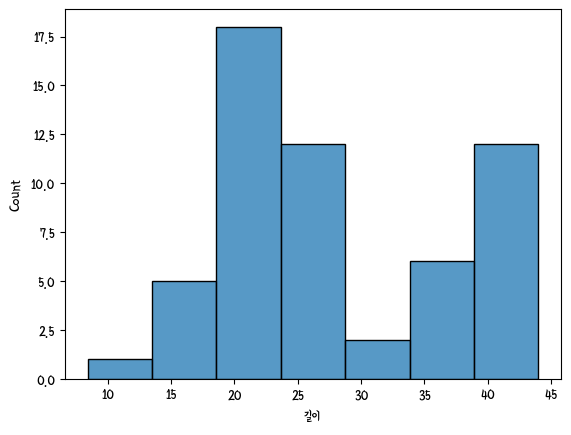

In [5]:
plt.figure()
sb.histplot(data["길이"],bins=7)
plt.show()
plt.close()

In [6]:
data.describe()

,길이,무게
count,56.000000,56.000000
mean,27.892857,382.239286
std,9.021668,347.617717
min,8.400000,5.900000
25%,21.825000,120.000000
50%,25.300000,207.500000
75%,36.625000,692.500000
max,44.000000,1100.000000


### 단순선형회귀니까 일단 진행하자

In [7]:
# 테스트 사이즈 0.3
train_data,test_data=train_test_split(data,random_state=10,train_size=0.7)

In [8]:
feature="길이"
target="무게"

### 지도학습

In [9]:
import sklearn.linear_model as sklin #linear_regression 할거임
import sklearn.pipeline as skpip
import numpy as np
import statsmodels.api as sm

In [10]:
model=sklin.LinearRegression(fit_intercept=False)

In [11]:
#단순선형
fit=model.fit(X=sm.add_constant(train_data[[feature]]),y=train_data[[target]])

In [12]:
model2=sklin.LinearRegression(fit_intercept=False)

In [13]:
degree=2 #2차식이라고 예측
d2_x=sm.add_constant(np.column_stack([train_data[[feature]]**i for i in range(1,degree+1)]))

In [14]:
d2_x

array([[1.00000e+00, 4.30000e+01, 1.84900e+03],
       [1.00000e+00, 3.90000e+01, 1.52100e+03],
       [1.00000e+00, 2.10000e+01, 4.41000e+02],
       [1.00000e+00, 3.45000e+01, 1.19025e+03],
       [1.00000e+00, 4.00000e+01, 1.60000e+03],
       [1.00000e+00, 2.20000e+01, 4.84000e+02],
       [1.00000e+00, 1.74000e+01, 3.02760e+02],
       [1.00000e+00, 1.37000e+01, 1.87690e+02],
       [1.00000e+00, 2.10000e+01, 4.41000e+02],
       [1.00000e+00, 4.00000e+01, 1.60000e+03],
       [1.00000e+00, 2.30000e+01, 5.29000e+02],
       [1.00000e+00, 2.75000e+01, 7.56250e+02],
       [1.00000e+00, 4.20000e+01, 1.76400e+03],
       [1.00000e+00, 2.25000e+01, 5.06250e+02],
       [1.00000e+00, 3.50000e+01, 1.22500e+03],
       [1.00000e+00, 1.80000e+01, 3.24000e+02],
       [1.00000e+00, 2.13000e+01, 4.53690e+02],
       [1.00000e+00, 2.20000e+01, 4.84000e+02],
       [1.00000e+00, 3.90000e+01, 1.52100e+03],
       [1.00000e+00, 2.75000e+01, 7.56250e+02],
       [1.00000e+00, 2.40000e+01, 5.7600

In [15]:
d2_x.shape

(39, 3)

In [16]:
fit2=model2.fit(X=d2_x,y=train_data[[target]])

In [18]:
fit2.n_features_in_

3

#### 상수항 추가-테스트 데이터

In [19]:
import statsmodels.api as sm

In [20]:
test_d1_x=sm.add_constant(test_data[[feature]])
test_d2_x=sm.add_constant(np.column_stack([test_data[[feature]]**i for i in range(1,degree+1)]))

In [21]:
pre_1_y=fit.predict(test_d1_x)
pre_2_y=fit2.predict(test_d2_x)

In [22]:
pre_1_y.squeeze()

array([370.39416491, -42.74972907, 377.83819903, 284.78777246,
       199.18138001, 173.12726057, 805.87016126, -87.41393383,
       228.95751652, 269.89970421, 396.44828435, 575.10510337,
       191.73734589, 422.50240379,  61.46674869,  50.3006975 ,
       731.42982001])

### 시각화

<Axes: xlabel='길이', ylabel='무게'>

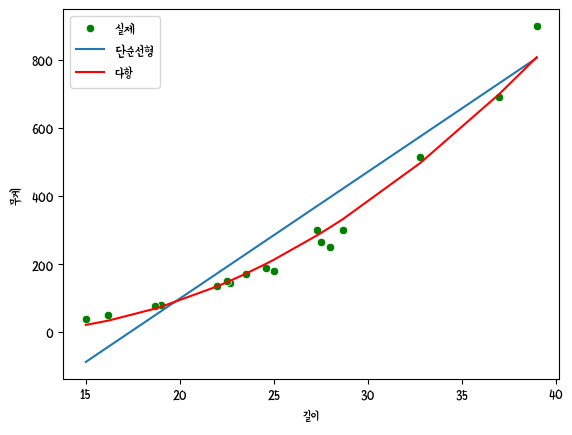

In [23]:
plt.figure()
sb.scatterplot(x=test_data[feature],y=test_data[target],label='실제',color="green")
sb.lineplot(x=test_data[feature],y=pre_1_y.squeeze(),label='단순선형')
sb.lineplot(x=test_data[feature],y=pre_2_y.squeeze(),label='다항',color="red")